In [264]:
import pandas as pd
import numpy as np
import itertools
from sklearn.preprocessing import StandardScaler, Imputer, LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

#### 1) Reading the train dataset created from preprocessing step

In [265]:
dataset = pd.read_csv("C:\\Users\\chait\\Documents\\Insofe\\PhD\\scripts\\my_train.csv", header=0)

#### 2) Exploratory Data Analysis

In [266]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674 entries, 0 to 673
Data columns (total 38 columns):
MachineID                      674 non-null object
MachineModel                   674 non-null object
ServicePeriod                  674 non-null int64
error1_avg                     674 non-null float64
error2_avg                     674 non-null float64
error3_avg                     674 non-null float64
error4_avg                     674 non-null float64
error5_avg                     674 non-null float64
Comp_Timelapse_diff_errors     674 non-null float64
RecentError                    674 non-null object
MostOccuredError               674 non-null object
comp_1_replace_avg             674 non-null float64
comp_2_replace_avg             674 non-null float64
comp_3_replace_avg             674 non-null float64
comp_4_replace_avg             674 non-null float64
Comp_Timelapse_diff_replace    674 non-null float64
RecentReplacedComp             674 non-null object
MostReplacedComp  

In [267]:
dataset.head()

,MachineID,MachineModel,ServicePeriod,error1_avg,error2_avg,error3_avg,error4_avg,error5_avg,Comp_Timelapse_diff_errors,RecentError,...,Sensor4_max,Sensor1_min,Sensor2_min,Sensor3_min,Sensor4_min,Sensor1_mean,Sensor2_mean,Sensor3_mean,Sensor4_mean,ActionPoint
0,MID11001,model4,21,60.00,35.65,40.71,0.0,65.00,13.58,error2,...,66.51,113.81,217.34,61.86,21.22,171.26,444.78,100.88,40.33,ComponentRepair
1,MID11002,model1,21,0.00,150.00,150.00,95.0,95.00,31.50,error5,...,73.26,108.43,208.67,62.02,21.12,170.38,445.79,101.04,40.49,ComponentRepair
2,MID11003,model3,22,37.50,90.00,93.54,0.0,85.00,27.27,error3,...,62.11,111.57,244.51,51.25,21.25,170.77,446.16,100.60,40.54,NoIssue
3,MID11004,model4,22,42.41,78.75,78.75,0.0,52.50,18.53,error2,...,63.70,111.27,238.93,61.19,22.79,170.74,445.82,100.78,40.59,NoIssue
4,MID11005,model3,22,44.21,96.44,33.24,0.0,56.25,19.02,error2,...,66.24,110.95,242.30,64.10,22.16,170.82,446.06,100.76,40.57,ComponentRepair


In [268]:
dataset.tail(5)

,MachineID,MachineModel,ServicePeriod,error1_avg,error2_avg,error3_avg,error4_avg,error5_avg,Comp_Timelapse_diff_errors,RecentError,...,Sensor4_max,Sensor1_min,Sensor2_min,Sensor3_min,Sensor4_min,Sensor1_mean,Sensor2_mean,Sensor3_mean,Sensor4_mean,ActionPoint
669,MID11845,model2,5,18.78,60.00,60.0,82.50,0.0,23.57,error4,...,64.44,116.03,226.84,63.30,22.10,170.90,447.85,101.06,40.20,NoIssue
670,MID11846,model3,4,44.88,45.00,45.0,23.71,0.0,15.50,error1,...,66.57,109.56,159.59,64.30,17.12,170.66,447.11,100.68,40.26,ComponentRepair
671,MID11847,model2,3,72.49,26.21,40.0,55.00,0.0,15.29,error2,...,66.77,119.70,223.41,58.28,23.15,170.72,446.87,101.42,40.26,ComponentReplacement
672,MID11848,model4,4,70.00,0.00,7.6,17.19,0.0,31.69,error1,...,62.87,117.16,160.57,62.36,20.97,170.80,447.65,100.49,40.26,ComponentRepair
673,MID11850,model3,3,39.10,54.00,54.0,0.00,0.0,21.39,error1,...,61.84,114.43,224.84,61.71,20.54,170.67,444.25,100.78,40.15,ComponentRepair


In [269]:
dataset.describe()

,ServicePeriod,error1_avg,error2_avg,error3_avg,error4_avg,error5_avg,Comp_Timelapse_diff_errors,comp_1_replace_avg,comp_2_replace_avg,comp_3_replace_avg,...,Sensor3_max,Sensor4_max,Sensor1_min,Sensor2_min,Sensor3_min,Sensor4_min,Sensor1_mean,Sensor2_mean,Sensor3_mean,Sensor4_mean
count,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,...,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000
mean,13.091988,44.113991,47.677389,46.326365,19.600445,25.634139,26.116884,37.440282,44.943234,18.009629,...,155.885697,64.889674,113.157478,217.153442,62.113843,21.118279,170.758917,446.624199,100.842478,40.365356
std,5.288455,34.573864,31.041506,31.879803,30.278308,33.797062,9.207301,39.119877,36.152294,31.166810,...,7.704799,2.921304,4.886335,26.071793,3.058292,1.519342,0.229260,0.889770,0.283153,0.125382
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,144.120000,58.490000,87.780000,102.170000,50.540000,14.640000,170.140000,443.760000,100.240000,40.090000
25%,9.000000,5.225000,29.580000,23.907500,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,...,150.752500,62.962500,110.627500,205.285000,60.420000,20.342500,170.610000,446.010000,100.650000,40.270000
50%,13.000000,45.000000,48.825000,48.000000,0.000000,0.000000,24.230000,35.000000,48.375000,0.000000,...,153.925000,64.290000,113.830000,221.575000,62.510000,21.265000,170.760000,446.605000,100.770000,40.340000
75%,18.000000,65.732500,67.500000,67.097500,45.000000,57.000000,30.000000,69.375000,67.500000,45.000000,...,158.175000,66.025000,116.487500,235.415000,64.380000,22.147500,170.900000,447.260000,100.990000,40.460000
max,22.000000,147.380000,157.500000,157.500000,135.000000,135.000000,95.390000,142.500000,162.060000,135.000000,...,195.270000,79.110000,123.610000,269.030000,67.840000,24.290000,171.530000,449.480000,101.660000,40.680000


#### 3)Dropping unnecessary columns and checking for null values

In [270]:
dataset.drop(labels=['MachineID', 'comp_4_replace_avg'], axis=1, inplace=True)

In [271]:
dataset.isnull().sum(axis=0)

MachineModel                   0
ServicePeriod                  0
error1_avg                     0
error2_avg                     0
error3_avg                     0
error4_avg                     0
error5_avg                     0
Comp_Timelapse_diff_errors     0
RecentError                    0
MostOccuredError               0
comp_1_replace_avg             0
comp_2_replace_avg             0
comp_3_replace_avg             0
Comp_Timelapse_diff_replace    0
RecentReplacedComp             0
MostReplacedComp               0
comp1_repair_avg               0
comp2_repair_avg               0
comp3_repair_avg               0
comp4_repair_avg               0
Comp_Timelapse_diff_repair     0
RecentRepaired                 0
MostRepairedComponent          0
Sensor1_max                    0
Sensor2_max                    0
Sensor3_max                    0
Sensor4_max                    0
Sensor1_min                    0
Sensor2_min                    0
Sensor3_min                    0
Sensor4_mi

#### 4) Filtering categorical and non categorical values

In [272]:
columns = dataset.columns
cat_attr = ['MachineModel', 'RecentError', 'MostOccuredError', 'RecentReplacedComp', 'MostReplacedComp', 'RecentRepaired', 'MostRepairedComponent', 'ActionPoint']
#num_attr = ['tenure', 'MonthlyCharges', 'TotalCharges']
num_attr = list(set(columns) - set(cat_attr))

In [273]:
print("The total columns in the dataset are {}".format(len(columns)))
print("The numerical columns in the dataset are {}".format(len(num_attr)))
print("The categorical columns in the dataset are {}".format(len(cat_attr)))

The total columns in the dataset are 36
The numerical columns in the dataset are 28
The categorical columns in the dataset are 8


#### 5) Typecasting the columns into required data types

In [274]:
dataset[num_attr] = dataset[num_attr].apply(lambda x: x.astype('float64'))

In [275]:
dataset[cat_attr] = dataset[cat_attr].apply(lambda x: x.astype('category'))
#dataset['ActionPoint'] = pd.Categorical(dataset['ActionPoint'])

In [276]:
dataset.dtypes

MachineModel                   category
ServicePeriod                   float64
error1_avg                      float64
error2_avg                      float64
error3_avg                      float64
error4_avg                      float64
error5_avg                      float64
Comp_Timelapse_diff_errors      float64
RecentError                    category
MostOccuredError               category
comp_1_replace_avg              float64
comp_2_replace_avg              float64
comp_3_replace_avg              float64
Comp_Timelapse_diff_replace     float64
RecentReplacedComp             category
MostReplacedComp               category
comp1_repair_avg                float64
comp2_repair_avg                float64
comp3_repair_avg                float64
comp4_repair_avg                float64
Comp_Timelapse_diff_repair      float64
RecentRepaired                 category
MostRepairedComponent          category
Sensor1_max                     float64
Sensor2_max                     float64


In [277]:
dataset.shape

(674, 36)

In [278]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674 entries, 0 to 673
Data columns (total 36 columns):
MachineModel                   674 non-null category
ServicePeriod                  674 non-null float64
error1_avg                     674 non-null float64
error2_avg                     674 non-null float64
error3_avg                     674 non-null float64
error4_avg                     674 non-null float64
error5_avg                     674 non-null float64
Comp_Timelapse_diff_errors     674 non-null float64
RecentError                    674 non-null category
MostOccuredError               674 non-null category
comp_1_replace_avg             674 non-null float64
comp_2_replace_avg             674 non-null float64
comp_3_replace_avg             674 non-null float64
Comp_Timelapse_diff_replace    674 non-null float64
RecentReplacedComp             674 non-null category
MostReplacedComp               674 non-null category
comp1_repair_avg               674 non-null float64
comp2_

#### 6) Class Proportionality

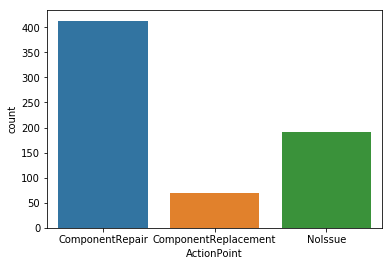

In [279]:
class_labels = dataset.ActionPoint
sns.countplot(x='ActionPoint', data=dataset)
#plt.savefig('class_prop.png')
plt.show()

#### 7) Encoding the class labels 

In [280]:
lab_enc = LabelEncoder()
lab_enc.fit(dataset['ActionPoint'])
dataset['ActionPoint'] = lab_enc.transform(dataset['ActionPoint'])

In [281]:
dataset['ActionPoint'].value_counts()

0    413
2    191
1     70
Name: ActionPoint, dtype: int64

In [282]:
labels = dataset['ActionPoint']
print(len(labels))
dataset.drop(labels='ActionPoint', axis=1, inplace=True)

674


#### 8) Dummifying the categorical variables

In [283]:
print(list(set(cat_attr)-set(['ActionPoint'])))
print(cat_attr)
##dataset_dumm = pd.get_dummies(data=dataset, columns=cat_attr)

['MostRepairedComponent', 'RecentError', 'RecentReplacedComp', 'MostReplacedComp', 'RecentRepaired', 'MachineModel', 'MostOccuredError']
['MachineModel', 'RecentError', 'MostOccuredError', 'RecentReplacedComp', 'MostReplacedComp', 'RecentRepaired', 'MostRepairedComponent', 'ActionPoint']


In [284]:
dataset_dumm = pd.get_dummies(data=dataset, columns=list(set(cat_attr)-set(['ActionPoint'])))

In [285]:
dataset_dumm.columns

Index(['ServicePeriod', 'error1_avg', 'error2_avg', 'error3_avg', 'error4_avg',
       'error5_avg', 'Comp_Timelapse_diff_errors', 'comp_1_replace_avg',
       'comp_2_replace_avg', 'comp_3_replace_avg',
       'Comp_Timelapse_diff_replace', 'comp1_repair_avg', 'comp2_repair_avg',
       'comp3_repair_avg', 'comp4_repair_avg', 'Comp_Timelapse_diff_repair',
       'Sensor1_max', 'Sensor2_max', 'Sensor3_max', 'Sensor4_max',
       'Sensor1_min', 'Sensor2_min', 'Sensor3_min', 'Sensor4_min',
       'Sensor1_mean', 'Sensor2_mean', 'Sensor3_mean', 'Sensor4_mean',
       'MostRepairedComponent_Component1', 'MostRepairedComponent_Component2',
       'MostRepairedComponent_Component3', 'MostRepairedComponent_Component4',
       'RecentError_error1', 'RecentError_error2', 'RecentError_error3',
       'RecentError_error4', 'RecentError_error5',
       'RecentReplacedComp_Component1', 'RecentReplacedComp_Component2',
       'RecentReplacedComp_Component3', 'RecentReplacedComp_Component4',
       '

In [286]:
dataset_dumm.head(6)

,ServicePeriod,error1_avg,error2_avg,error3_avg,error4_avg,error5_avg,Comp_Timelapse_diff_errors,comp_1_replace_avg,comp_2_replace_avg,comp_3_replace_avg,...,RecentRepaired_Component4,MachineModel_model1,MachineModel_model2,MachineModel_model3,MachineModel_model4,MostOccuredError_error1,MostOccuredError_error2,MostOccuredError_error3,MostOccuredError_error4,MostOccuredError_error5
0,21.0,60.00,35.65,40.71,0.0,65.00,13.58,60.0,47.5,0.0,...,0,0,0,0,1,0,1,0,0,0
1,21.0,0.00,150.00,150.00,95.0,95.00,31.50,0.0,150.0,95.0,...,0,1,0,0,0,0,0,0,1,0
2,22.0,37.50,90.00,93.54,0.0,85.00,27.27,37.5,135.0,0.0,...,0,0,0,1,0,0,1,0,0,0
3,22.0,42.41,78.75,78.75,0.0,52.50,18.53,0.0,105.0,0.0,...,0,0,0,0,1,1,0,0,0,0
4,22.0,44.21,96.44,33.24,0.0,56.25,19.02,45.0,30.0,0.0,...,1,0,0,1,0,0,0,1,0,0
5,21.0,41.25,19.81,7.57,98.9,40.00,14.13,82.5,0.0,0.0,...,0,0,0,1,0,1,0,0,0,0


In [287]:
#### splitting data into 3 clusters with abundant data

In [288]:
dataset_dumm['target'] = labels

In [289]:
dataset_dumm.head(10)

,ServicePeriod,error1_avg,error2_avg,error3_avg,error4_avg,error5_avg,Comp_Timelapse_diff_errors,comp_1_replace_avg,comp_2_replace_avg,comp_3_replace_avg,...,MachineModel_model1,MachineModel_model2,MachineModel_model3,MachineModel_model4,MostOccuredError_error1,MostOccuredError_error2,MostOccuredError_error3,MostOccuredError_error4,MostOccuredError_error5,target
0,21.0,60.00,35.65,40.71,0.00,65.00,13.58,60.00,47.5,0.00,...,0,0,0,1,0,1,0,0,0,0
1,21.0,0.00,150.00,150.00,95.00,95.00,31.50,0.00,150.0,95.00,...,1,0,0,0,0,0,0,1,0,0
2,22.0,37.50,90.00,93.54,0.00,85.00,27.27,37.50,135.0,0.00,...,0,0,1,0,0,1,0,0,0,2
3,22.0,42.41,78.75,78.75,0.00,52.50,18.53,0.00,105.0,0.00,...,0,0,0,1,1,0,0,0,0,2
4,22.0,44.21,96.44,33.24,0.00,56.25,19.02,45.00,30.0,0.00,...,0,0,1,0,0,0,1,0,0,0
5,21.0,41.25,19.81,7.57,98.90,40.00,14.13,82.50,0.0,0.00,...,0,0,1,0,1,0,0,0,0,0
6,21.0,0.00,27.02,69.73,0.00,42.00,21.00,0.00,0.0,0.00,...,0,0,0,1,0,0,0,0,1,1
7,21.0,30.00,30.00,30.00,0.00,65.00,27.27,80.04,30.0,0.00,...,0,0,1,0,0,1,0,0,0,0
8,21.0,42.67,71.25,71.25,56.25,55.00,16.09,35.00,95.0,56.25,...,1,0,0,0,1,0,0,0,0,0
9,21.0,93.43,0.00,0.00,0.00,63.00,31.50,0.00,0.0,0.00,...,0,0,0,1,0,0,0,0,1,2


In [290]:
dataset_dumm.shape

(674, 59)

In [291]:
imbal_data = dataset_dumm[dataset_dumm.target == 1]

In [292]:
print(imbal_data.head(5))
print(imbal_data.shape)

    ServicePeriod  error1_avg  error2_avg  error3_avg  error4_avg  error5_avg  \
6            21.0        0.00       27.02       69.73        0.00       42.00   
25           22.0       37.50      105.00      105.00       31.66       45.00   
26           21.0       33.00       45.25        0.00       67.50       56.25   
35           22.0       35.00       56.32       41.25       50.00       60.00   
41           21.0       37.52       93.87       82.50        0.00       41.32   

    Comp_Timelapse_diff_errors  comp_1_replace_avg  comp_2_replace_avg  \
6                        21.00                0.00                 0.0   
25                       22.50               37.50               105.0   
26                       16.88               41.25                 0.0   
35                       14.29               52.50                55.0   
41                       28.16                0.00                82.5   

    comp_3_replace_avg   ...    MachineModel_model1  MachineModel_mo

In [293]:
abn_data = dataset_dumm[dataset_dumm.target != 1]

In [294]:
abn_data.head(6)

,ServicePeriod,error1_avg,error2_avg,error3_avg,error4_avg,error5_avg,Comp_Timelapse_diff_errors,comp_1_replace_avg,comp_2_replace_avg,comp_3_replace_avg,...,MachineModel_model1,MachineModel_model2,MachineModel_model3,MachineModel_model4,MostOccuredError_error1,MostOccuredError_error2,MostOccuredError_error3,MostOccuredError_error4,MostOccuredError_error5,target
0,21.0,60.00,35.65,40.71,0.0,65.00,13.58,60.0,47.5,0.0,...,0,0,0,1,0,1,0,0,0,0
1,21.0,0.00,150.00,150.00,95.0,95.00,31.50,0.0,150.0,95.0,...,1,0,0,0,0,0,0,1,0,0
2,22.0,37.50,90.00,93.54,0.0,85.00,27.27,37.5,135.0,0.0,...,0,0,1,0,0,1,0,0,0,2
3,22.0,42.41,78.75,78.75,0.0,52.50,18.53,0.0,105.0,0.0,...,0,0,0,1,1,0,0,0,0,2
4,22.0,44.21,96.44,33.24,0.0,56.25,19.02,45.0,30.0,0.0,...,0,0,1,0,0,0,1,0,0,0
5,21.0,41.25,19.81,7.57,98.9,40.00,14.13,82.5,0.0,0.0,...,0,0,1,0,1,0,0,0,0,0


In [295]:
abn_data.shape

(604, 59)

In [296]:
abn_target = abn_data['target']
abn_data.drop('target', axis=1, inplace=True)

C:\Users\chait\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [297]:
print(len(abn_target))
print(abn_data.shape)

604
(604, 58)


In [298]:
std_scale = StandardScaler()
abn_data_std = std_scale.fit_transform(abn_data)

In [299]:
clt = KMeans(n_clusters=3, random_state=0)

In [300]:
clt_model = clt.fit(abn_data)

In [301]:
clt_labels = clt_model.labels_

In [302]:
abn_data['clt_labels'] = clt_labels

C:\Users\chait\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [303]:
abn_data.clt_labels[:6]

0    1
1    2
2    1
3    1
4    1
5    0
Name: clt_labels, dtype: int32

In [304]:
clt0_data = abn_data[abn_data['clt_labels'] == 0]

In [305]:
clt1_data = abn_data[abn_data['clt_labels'] == 1]

In [306]:
clt2_data = abn_data[abn_data['clt_labels'] == 2]

In [307]:
clt0_data.head(5)

,ServicePeriod,error1_avg,error2_avg,error3_avg,error4_avg,error5_avg,Comp_Timelapse_diff_errors,comp_1_replace_avg,comp_2_replace_avg,comp_3_replace_avg,...,MachineModel_model1,MachineModel_model2,MachineModel_model3,MachineModel_model4,MostOccuredError_error1,MostOccuredError_error2,MostOccuredError_error3,MostOccuredError_error4,MostOccuredError_error5,clt_labels
5,21.0,41.25,19.81,7.57,98.9,40.00,14.13,82.50,0.0,0.0,...,0,0,1,0,1,0,0,0,0,0
7,21.0,30.00,30.00,30.00,0.0,65.00,27.27,80.04,30.0,0.0,...,0,0,1,0,0,1,0,0,0,0
9,21.0,93.43,0.00,0.00,0.0,63.00,31.50,0.00,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
10,22.0,0.00,68.22,22.50,0.0,54.16,23.73,0.00,22.5,0.0,...,0,0,0,1,0,0,0,0,1,0
15,21.0,60.00,62.69,3.60,0.0,50.00,18.53,100.00,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0


In [308]:
print("The shape of cluster zero is {}".format(clt0_data.shape))
print("The shape of cluster one is {}".format(clt1_data.shape))
print("The shape of cluster two is {}".format(clt2_data.shape))

The shape of cluster zero is (196, 59)
The shape of cluster one is (269, 59)
The shape of cluster two is (139, 59)


In [309]:
#### Appending imbalance data

In [310]:
imbal_data.shape

(70, 59)

In [311]:
imbal_data['clt_labels'] = imbal_data['target']
imbal_data.drop('target', axis=1, inplace=True)

C:\Users\chait\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\chait\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [312]:
imbal_data['clt_labels'].replace(1, 3,inplace=True)

C:\Users\chait\Anaconda3\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [313]:
imbal_data.head(4)

,ServicePeriod,error1_avg,error2_avg,error3_avg,error4_avg,error5_avg,Comp_Timelapse_diff_errors,comp_1_replace_avg,comp_2_replace_avg,comp_3_replace_avg,...,MachineModel_model1,MachineModel_model2,MachineModel_model3,MachineModel_model4,MostOccuredError_error1,MostOccuredError_error2,MostOccuredError_error3,MostOccuredError_error4,MostOccuredError_error5,clt_labels
6,21.0,0.0,27.02,69.73,0.00,42.00,21.00,0.00,0.0,0.00,...,0,0,0,1,0,0,0,0,1,3
25,22.0,37.5,105.00,105.00,31.66,45.00,22.50,37.50,105.0,0.00,...,0,0,1,0,0,0,0,0,1,3
26,21.0,33.0,45.25,0.00,67.50,56.25,16.88,41.25,0.0,58.83,...,1,0,0,0,1,0,0,0,0,3
35,22.0,35.0,56.32,41.25,50.00,60.00,14.29,52.50,55.0,60.00,...,0,1,0,0,0,0,0,1,0,3


In [314]:
dataset1 = pd.concat([clt0_data, imbal_data], axis=0)
dataset1.shape

(266, 59)

In [315]:
dataset1.clt_labels.unique()

array([0, 3], dtype=int64)

In [316]:
dataset1['clt_labels'] = dataset1['clt_labels'].map({0: 0, 3: 1})

In [317]:
dataset1 = dataset1.sample(frac=1).reset_index(drop=True)

In [318]:
dataset1.shape

(266, 59)

In [319]:
dataset1.head(5)

,ServicePeriod,error1_avg,error2_avg,error3_avg,error4_avg,error5_avg,Comp_Timelapse_diff_errors,comp_1_replace_avg,comp_2_replace_avg,comp_3_replace_avg,...,MachineModel_model1,MachineModel_model2,MachineModel_model3,MachineModel_model4,MostOccuredError_error1,MostOccuredError_error2,MostOccuredError_error3,MostOccuredError_error4,MostOccuredError_error5,clt_labels
0,17.0,50.28,97.50,97.50,63.75,75.0,18.85,67.5,97.50,63.75,...,0,1,0,0,1,0,0,0,0,1
1,8.0,94.44,33.75,42.81,0.00,0.0,25.46,90.0,45.00,0.00,...,0,0,1,0,0,1,0,0,0,0
2,5.0,20.00,41.25,41.25,30.00,0.0,16.15,30.0,41.25,30.00,...,1,0,0,0,0,1,0,0,0,1
3,14.0,95.00,47.90,27.82,0.00,0.0,31.67,142.5,30.00,0.00,...,0,0,0,1,1,0,0,0,0,0
4,19.0,58.22,50.00,60.00,0.00,45.0,16.67,0.0,60.00,0.00,...,0,0,0,1,0,1,0,0,0,1


In [320]:
### Preparing dataset2

In [321]:
dataset2 = pd.concat([clt1_data, imbal_data], axis=0)
dataset2.shape

(339, 59)

In [322]:
dataset2.clt_labels.unique()

array([1, 3], dtype=int64)

In [323]:
dataset2['clt_labels'] = dataset2['clt_labels'].map({1: 0, 3: 1})

In [324]:
dataset2 = dataset2.sample(frac=1).reset_index(drop=True)

In [325]:
dataset2.shape

(339, 59)

In [326]:
dataset2.head()

,ServicePeriod,error1_avg,error2_avg,error3_avg,error4_avg,error5_avg,Comp_Timelapse_diff_errors,comp_1_replace_avg,comp_2_replace_avg,comp_3_replace_avg,...,MachineModel_model1,MachineModel_model2,MachineModel_model3,MachineModel_model4,MostOccuredError_error1,MostOccuredError_error2,MostOccuredError_error3,MostOccuredError_error4,MostOccuredError_error5,clt_labels
0,20.0,0.0,82.50,82.50,0.0,40.00,33.75,0.0,82.5,0.0,...,0,0,1,0,0,0,0,0,1,0
1,22.0,37.5,90.00,93.54,0.0,85.00,27.27,37.5,135.0,0.0,...,0,0,1,0,0,1,0,0,0,0
2,20.0,0.0,0.00,92.96,75.0,56.25,25.00,0.0,0.0,75.0,...,1,0,0,0,0,0,0,1,0,1
3,21.0,105.0,52.97,51.00,0.0,67.50,18.70,105.0,51.0,0.0,...,0,0,1,0,0,1,0,0,0,0
4,7.0,75.0,60.00,60.00,0.0,0.00,24.00,75.0,60.0,0.0,...,0,0,1,0,0,1,0,0,0,0


In [327]:
#### preparing dataset3

In [328]:
dataset3 = pd.concat([clt2_data, imbal_data], axis=0)
dataset3.shape

(209, 59)

In [329]:
dataset3.clt_labels.unique()

array([2, 3], dtype=int64)

In [330]:
dataset3['clt_labels'] = dataset3['clt_labels'].map({2: 0, 3: 1})

In [331]:
dataset3 = dataset3.sample(frac=1).reset_index(drop=True)

In [332]:
dataset3.shape

(209, 59)

In [333]:
dataset3.head(4)

,ServicePeriod,error1_avg,error2_avg,error3_avg,error4_avg,error5_avg,Comp_Timelapse_diff_errors,comp_1_replace_avg,comp_2_replace_avg,comp_3_replace_avg,...,MachineModel_model1,MachineModel_model2,MachineModel_model3,MachineModel_model4,MostOccuredError_error1,MostOccuredError_error2,MostOccuredError_error3,MostOccuredError_error4,MostOccuredError_error5,clt_labels
0,6.0,112.50,22.50,56.89,63.75,0.0,23.18,112.5,22.50,85.0,...,0,1,0,0,0,0,0,1,0,0
1,21.0,78.14,48.75,65.00,30.00,40.0,14.17,105.0,58.78,30.0,...,1,0,0,0,0,0,0,0,1,0
2,9.0,0.00,42.00,30.00,127.77,0.0,26.12,0.0,30.00,0.0,...,0,0,0,1,0,1,0,0,0,0
3,19.0,43.98,80.00,85.44,15.57,52.5,19.09,0.0,120.00,0.0,...,0,0,1,0,0,0,0,0,1,1


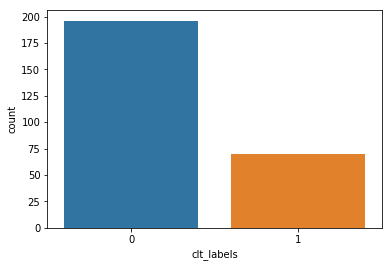

In [334]:
sns.countplot(x='clt_labels', data=dataset1)
#plt.savefig('class_prop.png')
plt.show()

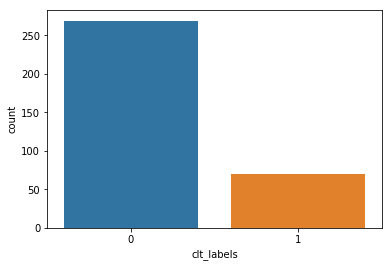

In [335]:
sns.countplot(x='clt_labels', data=dataset2)
#plt.savefig('class_prop.png')
plt.show()

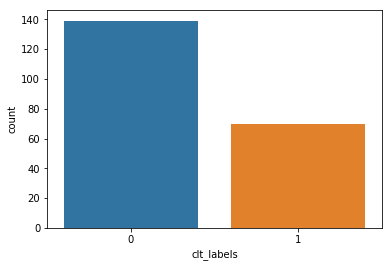

In [336]:
sns.countplot(x='clt_labels', data=dataset3)
#plt.savefig('class_prop.png')
plt.show()

In [337]:
labels1 = dataset1['clt_labels']
labels2 = dataset2['clt_labels']
labels3 = dataset3['clt_labels']

In [338]:
print("The len of labels1 is ", len(labels1))
print("The len of labels2 is ", len(labels2))
print("The len of labels3 is ", len(labels3))

The len of labels1 is  266
The len of labels2 is  339
The len of labels3 is  209


In [339]:
dataset1.drop('clt_labels', axis=1, inplace=True)
dataset2.drop('clt_labels', axis=1, inplace=True)
dataset3.drop('clt_labels', axis=1, inplace=True)

In [340]:
print("The shape of dataset1 is ", dataset1.shape)
print("The shape of dataset2 is ", dataset2.shape)
print("The shape of dataset3 is ", dataset3.shape)

The shape of dataset1 is  (266, 58)
The shape of dataset2 is  (339, 58)
The shape of dataset3 is  (209, 58)


### Model Building

#### 9) SVM

In [341]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(dataset1, labels1, test_size=0.2, stratify=labels1, random_state=0) #0.4

#### 10) Prepating the pipeline and hyperparameter tuning with cross validation

In [342]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [343]:
#Setting up pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())] #
pipeline = Pipeline(steps)

#### 11) Setting up hyper parameters like cost of error, kernel and class weights to address class imbalance

In [344]:
#Setting params grid for hyper param tuning
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=143)
param_grid = {'SVM__C': [40,50], 'SVM__gamma': [0.008, 0.003, 0.001], 'SVM__kernel':['rbf'],
             'SVM__class_weight':[{0:0.3, 1:1}]} #'SVM__class_weight':[{0:0.3, 1:2, 2:0.6}]
svm_grid = GridSearchCV(pipeline, param_grid=param_grid, cv=kfold)

In [345]:
svm_grid.fit(X_train1, y_train1)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=143, shuffle=True),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('SVM', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'SVM__C': [40, 50], 'SVM__gamma': [0.008, 0.003, 0.001], 'SVM__kernel': ['rbf'], 'SVM__class_weight': [{0: 0.3, 1: 1}]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

#### 12) Finding the best estimator from the grid search

In [346]:
svm_cv_best = svm_grid.best_estimator_
y_pred1 = svm_cv_best.predict(X_test1)

In [347]:
print("Accuracy: {}".format(svm_cv_best.score(X_test1, y_test1)))
print(classification_report(y_test1, y_pred1))
print("Tuned Model Best Parameters: {}".format(svm_grid.best_params_))
print("Tuned Model Best Score: {}".format(svm_grid.best_score_))

Accuracy: 0.8518518518518519
             precision    recall  f1-score   support

          0       0.88      0.93      0.90        40
          1       0.75      0.64      0.69        14

avg / total       0.85      0.85      0.85        54

Tuned Model Best Parameters: {'SVM__C': 40, 'SVM__class_weight': {0: 0.3, 1: 1}, 'SVM__gamma': 0.008, 'SVM__kernel': 'rbf'}
Tuned Model Best Score: 0.8443396226415094


#### 13) Confusion matrix

In [348]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=18)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=12)
    plt.yticks(tick_marks, classes, fontsize=12)

    fmt = '.05f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)

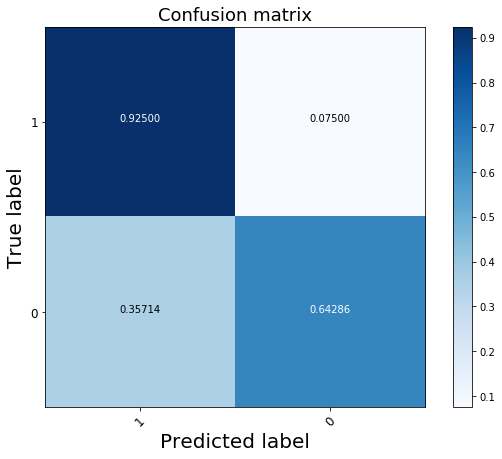

In [349]:
cnf_matrix = confusion_matrix(y_test1 , y_pred1)
plt.figure(figsize=(10,7))
plot_confusion_matrix(cnf_matrix, classes=labels1.unique(), title="Confusion matrix")
plt.show()

#### Linear SVM

In [350]:
from sklearn.svm import LinearSVC

In [351]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(dataset3, labels3, test_size=0.2, stratify=labels3, random_state=0) #0.4

In [352]:
#linear_svm = LinearSVC(random_state=143, C=10) #OneVsRestClassifier()
steps_linear = [('scaler', StandardScaler()),
         ('SVM_linear', LinearSVC())] 
pipeline_linear = Pipeline(steps_linear)

#Setting params grid for hyper param tuning
kfold = StratifiedKFold(n_splits=6, shuffle=True, random_state=143)
param_grid_linear = {'SVM__C': [50]}
linear_svm = GridSearchCV(pipeline, param_grid=param_grid_linear, cv=kfold)

In [353]:
linear_svm.fit(X_train3, y_train3)

GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=143, shuffle=True),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('SVM', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1, param_grid={'SVM__C': [50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [354]:
y_pred_linear3 = linear_svm.predict(X_test3)

In [355]:
print("Accuracy: {}".format(linear_svm.score(X_test3, y_test3)))
print(classification_report(y_test3, y_pred_linear3))
print("Tuned Model Best Parameters: {}".format(linear_svm.best_params_))
print("Tuned Model Best Score: {}".format(linear_svm.best_score_))

Accuracy: 0.8809523809523809
             precision    recall  f1-score   support

          0       0.87      0.96      0.92        28
          1       0.91      0.71      0.80        14

avg / total       0.88      0.88      0.88        42

Tuned Model Best Parameters: {'SVM__C': 50}
Tuned Model Best Score: 0.8023952095808383


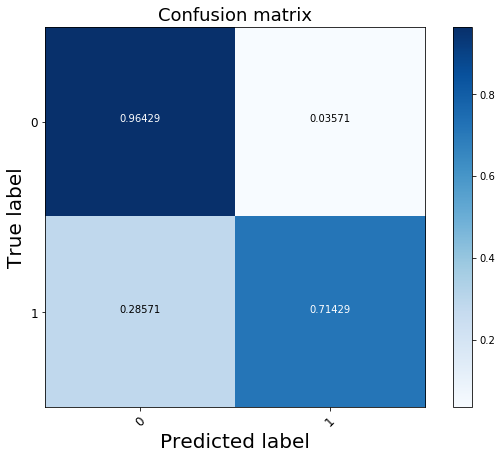

In [356]:
cnf_matrix = confusion_matrix(y_test3 , y_pred_linear3)
plt.figure(figsize=(10,7))
plot_confusion_matrix(cnf_matrix, classes=labels3.unique(), title="Confusion matrix")
plt.show()

#### SG classifier

In [357]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(dataset2, labels2, test_size=0.2, stratify=labels2, random_state=0) #0.4

In [358]:
steps_sgc = [('scaler', StandardScaler()),
         ('SGC', SGDClassifier(random_state=143))]
pipeline_sgc = Pipeline(steps_sgc)

#Setting params grid for hyper param tuning
kfold = StratifiedKFold(n_splits=6, shuffle=True, random_state=143)
param_grid_sgc = {'SGC__loss':['modified_huber'], 'SGC__penalty': ['elasticnet'], 'SGC__alpha': [0.2,0.3],
                     'SGC__l1_ratio': [0.1], 'SGC__max_iter': [70], 'SGC__learning_rate': ['optimal'], 
                     'SGC__eta0': [0.1], 'SGC__class_weight': [{0:0.3, 1:1}]}
sgc_cv = GridSearchCV(pipeline_sgc, param_grid=param_grid_sgc, cv=kfold)

In [359]:
sgc_cv.fit(X_train2, y_train2)

GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=143, shuffle=True),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('SGC', SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=143, shuffle=True,
       tol=None, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'SGC__loss': ['modified_huber'], 'SGC__penalty': ['elasticnet'], 'SGC__alpha': [0.2, 0.3], 'SGC__l1_ratio': [0.1], 'SGC__max_iter': [70], 'SGC__learning_rate': ['optimal'], 'SGC__eta0': [0.1], 'SGC__class_weight': [{0: 0.3, 1: 1}]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [360]:
sgc_cv_best = sgc_cv.best_estimator_
y_pred_sgc2 = sgc_cv_best.predict(X_test2)

In [361]:
print("Accuracy: {}".format(sgc_cv_best.score(X_test2, y_test2)))
print(classification_report(y_test2, y_pred_sgc2))
print("Tuned Model Best Parameters: {}".format(sgc_cv.best_params_))
print("Tuned Model Best Score: {}".format(sgc_cv.best_score_))

Accuracy: 0.8676470588235294
             precision    recall  f1-score   support

          0       0.87      0.98      0.92        54
          1       0.86      0.43      0.57        14

avg / total       0.87      0.87      0.85        68

Tuned Model Best Parameters: {'SGC__alpha': 0.3, 'SGC__class_weight': {0: 0.3, 1: 1}, 'SGC__eta0': 0.1, 'SGC__l1_ratio': 0.1, 'SGC__learning_rate': 'optimal', 'SGC__loss': 'modified_huber', 'SGC__max_iter': 70, 'SGC__penalty': 'elasticnet'}
Tuned Model Best Score: 0.8560885608856088


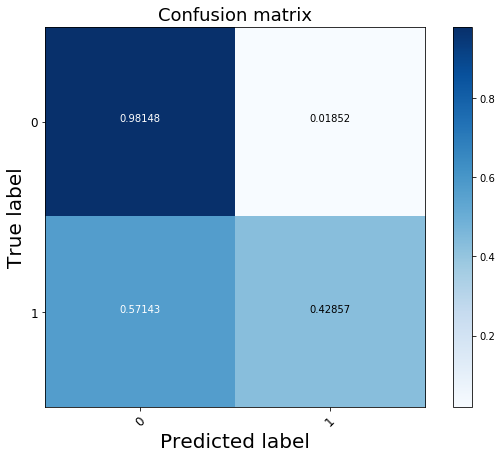

In [362]:
cnf_matrix = confusion_matrix(y_test2 , y_pred_sgc2)
plt.figure(figsize=(10,7))
plot_confusion_matrix(cnf_matrix, classes=labels2.unique(), title="Confusion matrix")
plt.show()

### Predicting on test data and writing results back to csv

In [363]:
test = pd.read_csv("C:\\Users\\chait\\Documents\\Insofe\\PhD\\scripts\\my_test.csv", header=0)

In [364]:
test.head(6)

,MachineID,MachineModel,ServicePeriod,error1_avg,error2_avg,error3_avg,error4_avg,error5_avg,Comp_Timelapse_diff_errors,RecentError,...,Sensor3_max,Sensor4_max,Sensor1_min,Sensor2_min,Sensor3_min,Sensor4_min,Sensor1_mean,Sensor2_mean,Sensor3_mean,Sensor4_mean
0,MID11006,model3,21,45.00,20.0,20.0,0.0,50.00,19.00,error1,...,156.43,65.47,113.24,198.63,61.67,21.63,170.78,446.93,100.87,40.55
1,MID11007,model2,21,30.00,25.9,0.0,60.0,40.00,17.14,error5,...,158.08,64.81,117.10,235.26,57.40,21.46,170.26,446.78,101.52,40.64
2,MID11039,model3,22,45.00,60.0,60.0,0.0,75.00,23.08,error1,...,152.31,69.27,118.99,217.51,64.54,21.08,170.94,446.35,100.87,40.57
3,MID11045,model4,21,30.00,25.0,25.0,0.0,62.26,16.98,error5,...,163.95,64.18,115.16,218.24,55.81,20.89,171.17,447.03,100.84,40.36
4,MID11049,model4,21,0.00,0.0,0.0,38.6,67.50,33.75,error5,...,146.07,64.56,102.39,205.97,66.63,21.34,170.73,446.50,100.61,40.52
5,MID11052,model3,21,84.43,100.0,100.0,0.0,75.00,22.50,error3,...,147.56,66.28,117.62,234.11,64.21,20.84,170.56,445.97,100.63,40.40


In [365]:
test_machineID = test.MachineID.tolist()
test.drop(labels=['MachineID','comp_4_replace_avg'], axis=1, inplace=True)

In [366]:
test_machineID[5]

'MID11052'

In [367]:
test.isnull().sum(axis=0)

MachineModel                   0
ServicePeriod                  0
error1_avg                     0
error2_avg                     0
error3_avg                     0
error4_avg                     0
error5_avg                     0
Comp_Timelapse_diff_errors     0
RecentError                    0
MostOccuredError               0
comp_1_replace_avg             0
comp_2_replace_avg             0
comp_3_replace_avg             0
Comp_Timelapse_diff_replace    0
RecentReplacedComp             0
MostReplacedComp               0
comp1_repair_avg               0
comp2_repair_avg               0
comp3_repair_avg               0
comp4_repair_avg               0
Comp_Timelapse_diff_repair     0
RecentRepaired                 0
MostRepairedComponent          0
Sensor1_max                    0
Sensor2_max                    0
Sensor3_max                    0
Sensor4_max                    0
Sensor1_min                    0
Sensor2_min                    0
Sensor3_min                    0
Sensor4_mi

In [368]:
test.dtypes

MachineModel                    object
ServicePeriod                    int64
error1_avg                     float64
error2_avg                     float64
error3_avg                     float64
error4_avg                     float64
error5_avg                     float64
Comp_Timelapse_diff_errors     float64
RecentError                     object
MostOccuredError                object
comp_1_replace_avg             float64
comp_2_replace_avg             float64
comp_3_replace_avg             float64
Comp_Timelapse_diff_replace    float64
RecentReplacedComp              object
MostReplacedComp                object
comp1_repair_avg               float64
comp2_repair_avg               float64
comp3_repair_avg               float64
comp4_repair_avg               float64
Comp_Timelapse_diff_repair     float64
RecentRepaired                  object
MostRepairedComponent           object
Sensor1_max                    float64
Sensor2_max                    float64
Sensor3_max              

In [369]:
test_columns = dataset.columns
test_cat_attr = ['MachineModel', 'RecentError', 'MostOccuredError', 'RecentReplacedComp', 'MostReplacedComp', 'RecentRepaired', 'MostRepairedComponent']
#num_attr = ['tenure', 'MonthlyCharges', 'TotalCharges']
test_num_attr = list(set(test_columns) - set(test_cat_attr))

In [370]:
print("The total columns in the dataset are {}".format(len(test_columns)))
print("The numerical columns in the dataset are {}".format(len(test_num_attr)))
print("The categorical columns in the dataset are {}".format(len(test_cat_attr)))

The total columns in the dataset are 35
The numerical columns in the dataset are 28
The categorical columns in the dataset are 7


In [371]:
test[test_num_attr] = dataset[test_num_attr].apply(lambda x: x.astype('float64'))

In [372]:
test[test_cat_attr] = dataset[test_cat_attr].apply(lambda x: x.astype('category'))

In [373]:
test.dtypes

MachineModel                   category
ServicePeriod                   float64
error1_avg                      float64
error2_avg                      float64
error3_avg                      float64
error4_avg                      float64
error5_avg                      float64
Comp_Timelapse_diff_errors      float64
RecentError                    category
MostOccuredError               category
comp_1_replace_avg              float64
comp_2_replace_avg              float64
comp_3_replace_avg              float64
Comp_Timelapse_diff_replace     float64
RecentReplacedComp             category
MostReplacedComp               category
comp1_repair_avg                float64
comp2_repair_avg                float64
comp3_repair_avg                float64
comp4_repair_avg                float64
Comp_Timelapse_diff_repair      float64
RecentRepaired                 category
MostRepairedComponent          category
Sensor1_max                     float64
Sensor2_max                     float64


In [374]:
test_dumm = pd.get_dummies(data=test, columns=test_cat_attr)

In [375]:
test_dumm.columns

Index(['ServicePeriod', 'error1_avg', 'error2_avg', 'error3_avg', 'error4_avg',
       'error5_avg', 'Comp_Timelapse_diff_errors', 'comp_1_replace_avg',
       'comp_2_replace_avg', 'comp_3_replace_avg',
       'Comp_Timelapse_diff_replace', 'comp1_repair_avg', 'comp2_repair_avg',
       'comp3_repair_avg', 'comp4_repair_avg', 'Comp_Timelapse_diff_repair',
       'Sensor1_max', 'Sensor2_max', 'Sensor3_max', 'Sensor4_max',
       'Sensor1_min', 'Sensor2_min', 'Sensor3_min', 'Sensor4_min',
       'Sensor1_mean', 'Sensor2_mean', 'Sensor3_mean', 'Sensor4_mean',
       'MachineModel_model1', 'MachineModel_model2', 'MachineModel_model3',
       'MachineModel_model4', 'RecentError_error1', 'RecentError_error2',
       'RecentError_error3', 'RecentError_error4', 'RecentError_error5',
       'MostOccuredError_error1', 'MostOccuredError_error2',
       'MostOccuredError_error3', 'MostOccuredError_error4',
       'MostOccuredError_error5', 'RecentReplacedComp_Component1',
       'RecentReplacedCo

In [376]:
### Model1  Predictions

In [377]:
test_preds1 = svm_cv_best.predict(test_dumm)

In [378]:
test_preds1.shape

(326,)

In [379]:
test_preds1[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [380]:
#### Model2 predictions

In [381]:
test_preds2 = sgc_cv_best.predict(test_dumm)

In [382]:
test_preds2.shape

(326,)

In [383]:
test_preds2[:5]

array([1, 1, 0, 0, 1], dtype=int64)

In [384]:
#### Model 3 predictions

In [385]:
test_preds3 = linear_svm.predict(test_dumm)

In [386]:
test_preds3.shape

(326,)

In [387]:
test_preds3[:5]

array([1, 0, 1, 0, 1], dtype=int64)

In [388]:
print("Length of test machine ID {}".format(len(test_machineID)))
print("Length of test pred classes {}".format(len(test_preds3)))

Length of test machine ID 326
Length of test pred classes 326


In [389]:
test_preds_dict = {'Testpreds1': test_preds1, 'Testpreds2': test_preds2, 'Testpreds3': test_preds3}
test_preds_df = pd.DataFrame(test_preds_dict)

In [390]:
test_preds_df.head(5)

,Testpreds1,Testpreds2,Testpreds3
0,1,1,1
1,1,1,0
2,1,0,1
3,1,0,0
4,1,1,1


In [391]:
result_preds = test_preds_df.mode(axis=1)

In [392]:
result_preds.columns = ['result']

In [393]:
result_preds.head(5)

,result
0,1
1,1
2,1
3,0
4,1


In [394]:
result_preds['result'] = result_preds['result'].map({0: 'ComponentRepair', 1: 'ComponentReplacement'})

In [395]:
result_preds.head(5)

,result
0,ComponentReplacement
1,ComponentReplacement
2,ComponentReplacement
3,ComponentRepair
4,ComponentReplacement


In [396]:
result_preds['result'].value_counts()

ComponentReplacement    235
ComponentRepair          91
Name: result, dtype: int64

In [397]:
test_df.to_csv('../submissions/clustering.csv', index=False)